# Example (Maps)

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
data = pd.read_csv('./data/gunluk-arac-saym-21.csv', encoding = 'iso8859-9',
                    delimiter = ';',
                    decimal = ',',
                    thousands = '.')

data

,Tarih,Sensor Adi,X Koordinati,Y Koordinati,Arac Sayisi,Unnamed: 5
0,1012021.0,TEM Arıcılar,2.898199e+01,4.110021e+01,37325.0,NaN
1,1012021.0,TEM Mahmutbey Gişeler,2.880687e+15,4.106131e+15,24861.0,NaN
2,1012021.0,D100 Gülsuyu,2.915252e+01,4.092487e+01,19380.0,NaN
3,1012021.0,Kavacık Hisar Evleri,2.909468e+01,4.108283e+01,31554.0,NaN
4,1012021.0,Ümraniye Kavşağı,2.912109e+01,4.102894e+01,24416.0,NaN
...,...,...,...,...,...,...
97331,NaN,NaN,NaN,NaN,NaN,NaN
97332,NaN,NaN,NaN,NaN,NaN,NaN
97333,NaN,NaN,NaN,NaN,NaN,NaN
97334,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
totals21 = data.groupby('Sensor Adi')['Arac Sayisi'].sum()
totals21.sort_values(ascending = False) / 365

Sensor Adi
TEM Çakmak Köprüsü              221696.726027
TEM Çakmak                      220553.136986
TEM İstoç                       189507.446575
TEM Halkalı                     188737.295890
Bayrampaşa                      180058.857534
                                    ...      
Ortaköy Sahil                     1074.871233
Uskumruköy Bağlantı Yolu           995.386301
4. Levent                            0.158904
D100 Ambarlı  B.Çekmece Yönü         0.000000
Veliefendi                           0.000000
Name: Arac Sayisi, Length: 309, dtype: float64

In [4]:
select = totals21[totals21/365 > 10000]
select.sort_values(ascending = False)

Sensor Adi
TEM Çakmak Köprüsü                    80919305.0
TEM Çakmak                            80501895.0
TEM İstoç                             69170218.0
TEM Halkalı                           68889113.0
Bayrampaşa                            65721483.0
                                         ...    
Yavuz Sultan Selim Köprüsü Anadolu     4480544.0
Üsküdar Sahil Yolu                     4250159.0
Gümüşdere                              4162808.0
Aşiyan Parkı                           3880097.0
Pirinççi                               3836230.0
Name: Arac Sayisi, Length: 264, dtype: float64

In [5]:
tmp = data.groupby(['X Koordinati', 'Y Koordinati'])['Arac Sayisi'].sum()/365
tmp

X Koordinati  Y Koordinati
1.000000e+00  1.000000e+00    38677.846575
2.838385e+01  4.105210e+01    20058.109589
2.839269e+01  4.106764e+01    28664.090411
2.843498e+01  4.105169e+01    34295.542466
2.845456e+01  4.105414e+01    32528.109589
                                  ...     
2.937507e+01  4.088631e+01    78453.597260
2.888556e+07  4.105083e+07    59976.408219
2.908417e+07  4.098802e+07    78348.967123
2.880687e+15  4.106131e+15    27676.457534
2.900138e+15  4.122074e+15     4725.430137
Name: Arac Sayisi, Length: 332, dtype: float64

In [6]:
vehicles = tmp[tmp>1e4]
vehicles

X Koordinati  Y Koordinati
1.000000e+00  1.000000e+00    38677.846575
2.838385e+01  4.105210e+01    20058.109589
2.839269e+01  4.106764e+01    28664.090411
2.843498e+01  4.105169e+01    34295.542466
2.845456e+01  4.105414e+01    32528.109589
                                  ...     
2.936343e+01  4.090512e+01    63379.230137
2.937507e+01  4.088631e+01    78453.597260
2.888556e+07  4.105083e+07    59976.408219
2.908417e+07  4.098802e+07    78348.967123
2.880687e+15  4.106131e+15    27676.457534
Name: Arac Sayisi, Length: 284, dtype: float64

In [7]:
coords = vehicles.index.to_frame()
coords.columns = ['lat', 'lon']
coords

,,lat,lon
X Koordinati,Y Koordinati,,
1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2.838385e+01,4.105210e+01,2.838385e+01,4.105210e+01
2.839269e+01,4.106764e+01,2.839269e+01,4.106764e+01
2.843498e+01,4.105169e+01,2.843498e+01,4.105169e+01
2.845456e+01,4.105414e+01,2.845456e+01,4.105414e+01
...,...,...,...
2.936343e+01,4.090512e+01,2.936343e+01,4.090512e+01
2.937507e+01,4.088631e+01,2.937507e+01,4.088631e+01
2.888556e+07,4.105083e+07,2.888556e+07,4.105083e+07


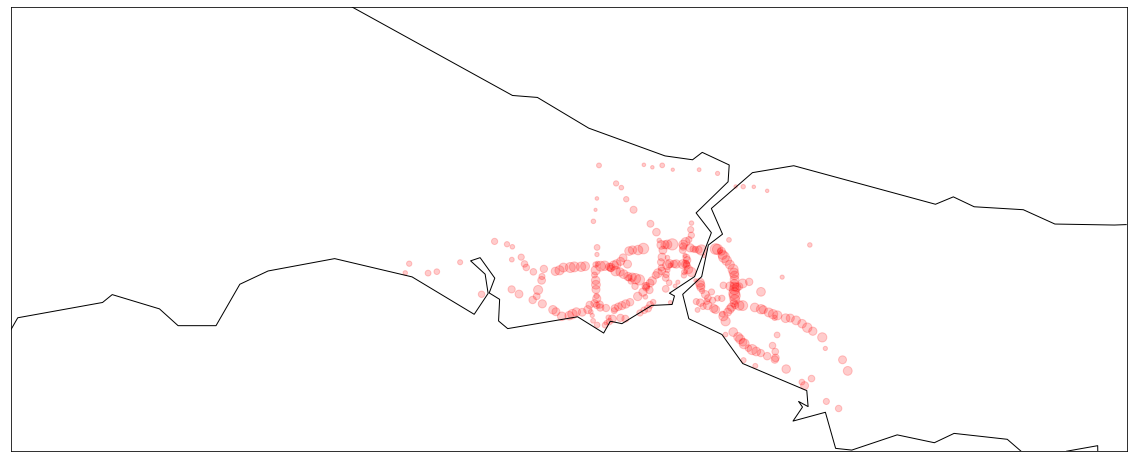

In [8]:
fig = plt.figure(figsize = (20, 12))

m = Basemap(projection = 'merc',
            llcrnrlat = 40.75, 
            urcrnrlat = 41.5,
            llcrnrlon = 27.5,
            urcrnrlon = 30.0,
            resolution = 'i')

m.drawcoastlines()

xs, ys = m(coords['lat'], coords['lon'])
#m.drawlsmask(land_color='wheat', ocean_color='lightblue')

m.scatter(xs, ys, s = vehicles/1e3, c = 'red', alpha = 0.2)

plt.show()